<div style="width: 50%; float: left">
    <img src="../ups2.png" width="217" align="center">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>NRO. PRÁCTICA: </strong>3
    <br>
    <strong>ESTUDIANTE: </strong>Doménica Merchán García
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">PRÁCTICA DE LABORATORIO</strong>
    <br>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Modelo para contagio de COVID en Ecuador
    <br>
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Primero se inicializan las variables de entrada, donde:

- P es la población del Ecuador
- I0 es la cantidad de infectados
- R0 es la cantidad de recuperados
- S0 es la población menos los infectados menos los recuperados
- beta es la taza de contagio
- gamma es la taza de recuperación

De acuerdo con el Banco de Datos Mundial, el Ecuador en 2021 tendría una población de 17370000 habitantes [1]. La cantidad de casos confirmados en el país es de 427690 y los pacientes recuperados son 375151 de acuerdo con el Ministerio de Salud Pública [2].

In [3]:
P = 17370000
I0 = 427690
R0 = 375151
S0 = P - I0 - R0
beta = 0.4
gamma = 1/10
t = np.linspace(0, 365, 365)

Se crea un método para resolver ecuaciones diferenciales del model SIR.

In [4]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [7]:
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(P, beta, gamma))
S, I, R = ret.T

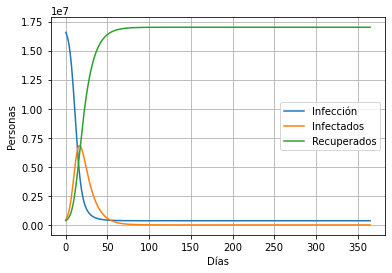

In [9]:
plt.plot(t, S, label = 'Infección')
plt.plot(t, I, label = 'Infectados')
plt.plot(t, R, label = 'Recuperados')
plt.xlabel('Días')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

[1] https://datatopics.worldbank.org/world-development-indicators/

[2] https://www.salud.gob.ec/actualizacion-de-casos-de-coronavirus-en-ecuador/